In [1]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Helper function to convert time string to seconds
def time_to_seconds(timestamp):
    minutes, seconds = map(float, timestamp.replace('m', '').replace('s', '').split())
    return minutes * 60 + seconds

In [3]:
# Function to process label files and calculate cumulative lengths
def calculate_cumulative_lengths(labels_dir):
    maqam_length = defaultdict(float)
    maqam_branch_length = defaultdict(float)
    branch_length = defaultdict(float)
    degree_length = defaultdict(float)
    condition_length = defaultdict(float)

    for filename in os.listdir(labels_dir):
        if filename.endswith('.json'):
            with open(os.path.join(labels_dir, filename), 'r') as f:
                label = json.load(f)
                surah = label['surah']
                timestamp = label['timestamp']
                maqam = label['maqam'][0] if isinstance(label['maqam'], list) else label['maqam']
                branch = label['branch'][0] if isinstance(label['branch'], list) else label['branch']
                degree = label['degree'][0] if isinstance(label['degree'], list) else label['degree']
                sign = label['sign'][0] if isinstance(label['sign'], list) else label['sign']

                length = time_to_seconds(timestamp)

                maqam_length[maqam] += length
                maqam_branch_length[f'{maqam}+{branch}'] += length
                branch_length[branch] += length
                combined_degree = f'{sign}{degree}' if degree != '0' else degree
                degree_length[combined_degree] += length
                condition_length[f'{maqam}+{branch}+{combined_degree}'] += length

    return maqam_length, maqam_branch_length, branch_length, degree_length, condition_length

defaultdict(<class 'float'>, {"['عجم']": 12067.0, "['راست']": 44342.0, "['نهاوند']": 56647.0, "['صبا']": 18591.0, "['سيكاه']": 42581.0, "['بيات']": 47234.0, "['حجاز']": 49064.0, "['كرد']": 6644.0})
defaultdict(<class 'float'>, {'Ajam': 12067.0, 'Rast': 44342.0, 'Nahawand': 56647.0, 'Saba': 18591.0, 'Seekah': 42581.0, 'Bayat': 47234.0, 'Hejaz': 49064.0, 'Kurd': 6644.0})
these are the labels ('Nahawand', 'Hejaz', 'Bayat', 'Rast', 'Seekah', 'Saba', 'Ajam', 'Kurd')


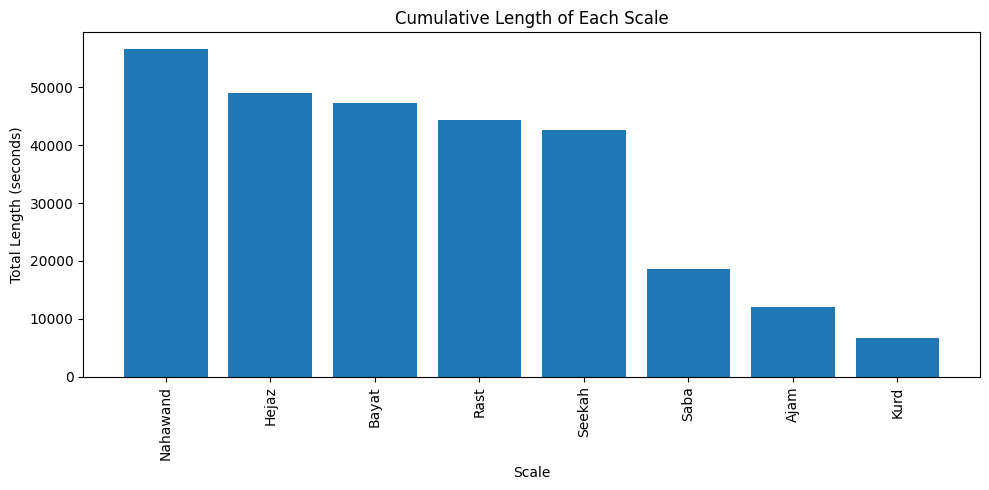

In [7]:
# Plotting function
print(maqam_length)

translate = {
    'بيات': 'Bayat',
    'حجاز': 'Hejaz',
    'راست': 'Rast',
    'سيكاه': 'Seekah',
    'صبا': 'Saba',
    'عجم': 'Ajam',
    'كرد': 'Kurd',
    'نهاوند': 'Nahawand'
}

# Transform the keys
translated_maqam_length = defaultdict(float, {
    translate[key.strip("[]'")]: value for key, value in maqam_length.items()
})

# Print the result
print(translated_maqam_length)

plot_cumulative_data(translated_maqam_length, 'Cumulative Length of Each Scale', 'Scale', 'Total Length (seconds)')

In [4]:
# Plotting function
def plot_cumulative_data(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    items = sorted(data.items(), key=lambda x: x[1], reverse=True)
    labels, values = zip(*items)
    print('these are the labels', labels)
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

these are the labels ("['نهاوند']", "['حجاز']", "['بيات']", "['راست']", "['سيكاه']", "['صبا']", "['عجم']", "['كرد']")


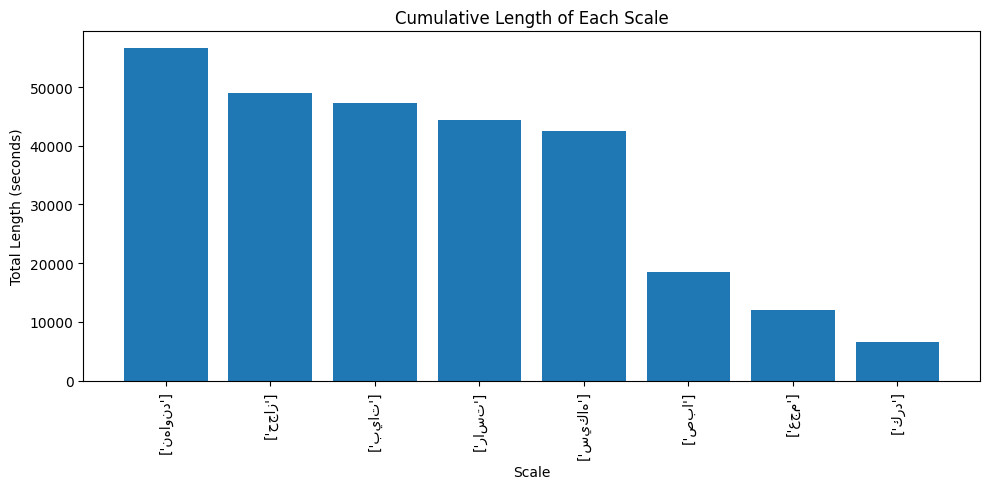

these are the labels ("['بيات']+['دوكاه']", "['حجاز']+['دوكاه']", "['سيكاه']+['سيكاه']", "['نهاوند']+['نهاوند']", "['راست']+['راست']", "['نهاوند']+['فروع']", "['راست']+['نوا']", "['عجم']+['شوقأفزا']", "['نهاوند']+['كردي']", "['صبا']+['دوكاه']", "['صبا']+['منصوري']", "['بيات']+['نوا']", "['نهاوند']+['نواأثر']", "['كرد']+['دوكاه']", "['حجاز']+['نوا']", "['سيكاه']+['فروع']", "['راست']+['سوزناك']", "['حجاز']+['فروع']", "['صبا']+['نوا']", "['راست']+['كردان']", "['نهاوند']+['عشاق']", "['حجاز']+['شهناز']", "['سيكاه']+['نوا']", "['نهاوند']+['نوا']", "['كرد']+['نوا']", "['سيكاه']+['هزام']", "['راست']+['نيروز']", "['عجم']+['عجم']", "['راست']+['فروع']", "['بيات']+['شوري']", "['نهاوند']+['مرصع']", "['سيكاه']+['عراق']")


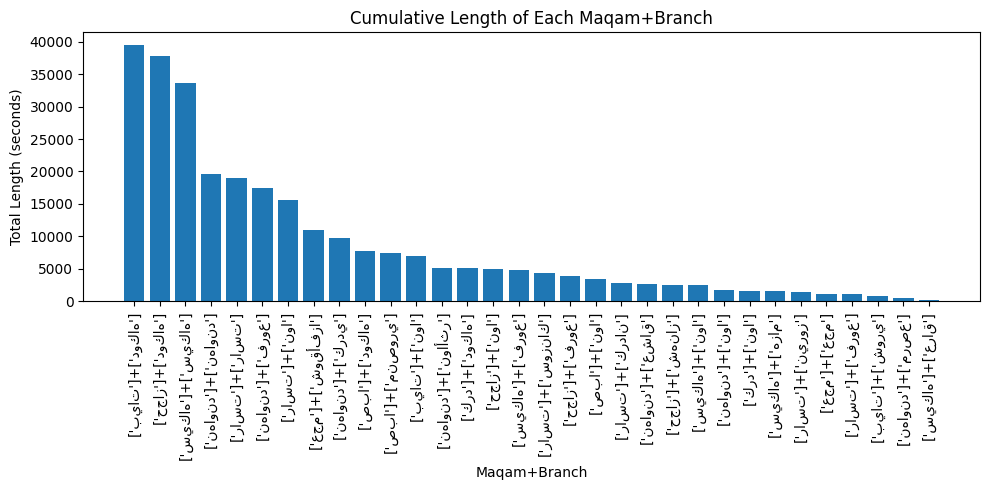

these are the labels ("['دوكاه']", "['نوا']", "['سيكاه']", "['فروع']", "['نهاوند']", "['راست']", "['شوقأفزا']", "['كردي']", "['منصوري']", "['نواأثر']", "['سوزناك']", "['كردان']", "['عشاق']", "['شهناز']", "['هزام']", "['نيروز']", "['عجم']", "['شوري']", "['مرصع']", "['عراق']")


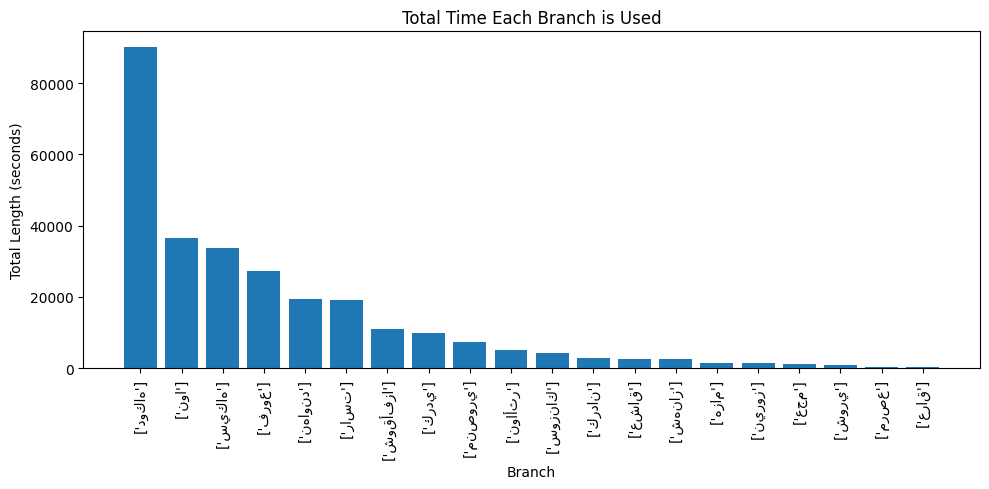

these are the labels ("['+']['3']", "['+']['2']", "['+']['1']", "['+']['4']", "['-']['0']", "nan['0']", "['+']['5']", "['+']['7']", "['-']['2']", "['-']['3']", "['-']['1']")


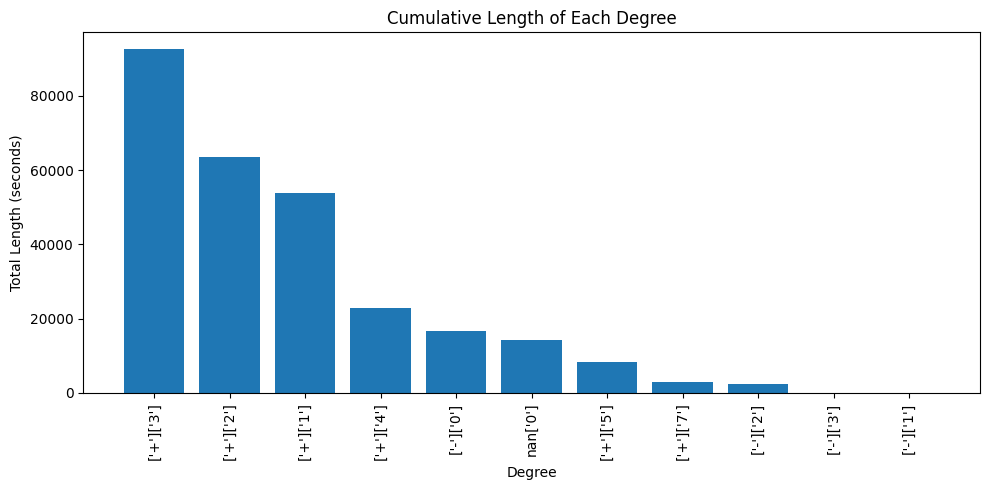

these are the labels ("['بيات']+['دوكاه']+['+']['3']", "['سيكاه']+['سيكاه']+['+']['2']", "['حجاز']+['دوكاه']+['+']['2']", "['حجاز']+['دوكاه']+['+']['3']", "['راست']+['راست']+['+']['4']", "['بيات']+['دوكاه']+['+']['2']", "['نهاوند']+['فروع']+['+']['1']", "['راست']+['نوا']+['+']['3']", "['نهاوند']+['نهاوند']+['+']['1']", "['حجاز']+['دوكاه']+['+']['1']", "['بيات']+['دوكاه']+nan['0']", "['صبا']+['دوكاه']+['+']['3']", "['سيكاه']+['سيكاه']+['+']['1']", "['نهاوند']+['نهاوند']+['+']['3']", "['سيكاه']+['سيكاه']+['+']['3']", "['بيات']+['نوا']+['+']['3']", "['عجم']+['شوقأفزا']+['+']['1']", "['راست']+['نوا']+['+']['5']", "['راست']+['راست']+['+']['3']", "['سيكاه']+['فروع']+['+']['1']", "['عجم']+['شوقأفزا']+['+']['2']", "['صبا']+['منصوري']+['+']['3']", "['نهاوند']+['كردي']+['+']['2']", "['سيكاه']+['سيكاه']+['-']['0']", "['نهاوند']+['فروع']+['+']['4']", "['حجاز']+['فروع']+['-']['0']", "['حجاز']+['دوكاه']+['-']['0']", "['صبا']+['نوا']+['+']['3']", "['راست']+['سوزناك']+['+']['1']", "['بيات']+['دوكاه']+

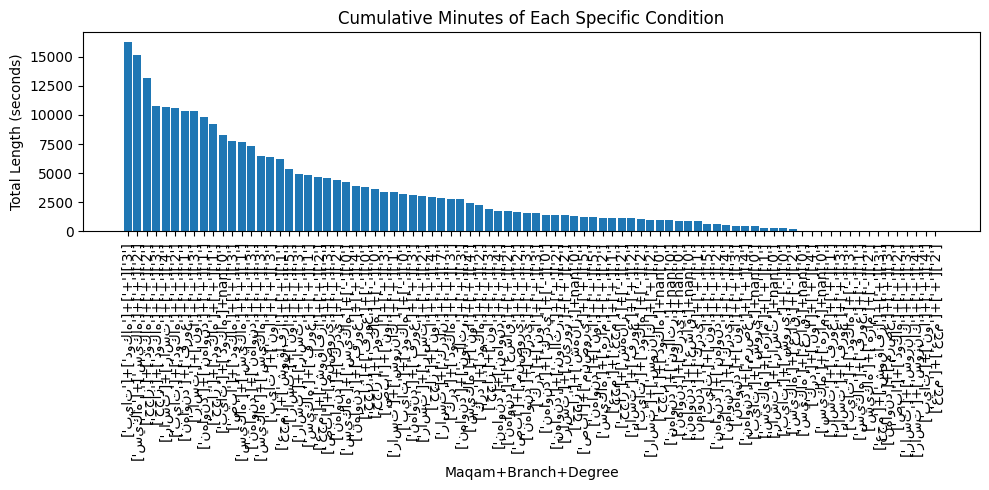

In [5]:
if __name__ == "__main__":

    data_dir = 'data'  # Assuming the current working directory contains 'data'
    labels_dir = 'labels'  # Assuming the current working directory contains 'labels'

    maqam_length, maqam_branch_length, branch_length, degree_length, condition_length = calculate_cumulative_lengths(labels_dir)

    # Plot cumulative lengths
    plot_cumulative_data(maqam_length, 'Cumulative Length of Each Scale', 'Scale', 'Total Length (seconds)')
    plot_cumulative_data(maqam_branch_length, 'Cumulative Length of Each Maqam+Branch', 'Maqam+Branch', 'Total Length (seconds)')
    plot_cumulative_data(branch_length, 'Total Time Each Branch is Used', 'Branch', 'Total Length (seconds)')
    plot_cumulative_data(degree_length, 'Cumulative Length of Each Degree', 'Degree', 'Total Length (seconds)')
    plot_cumulative_data(condition_length, 'Cumulative Minutes of Each Specific Condition', 'Maqam+Branch+Degree', 'Total Length (seconds)')